In [1]:
from Bio.PDB import PDBList
from Bio.SeqUtils import seq1
from Bio import SeqIO

import os

from helpers.helper import get_cath
import random

import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import copy



In [2]:
cath = get_cath()

In [3]:
seed = 2023

In [4]:
random.seed(seed)

In [5]:
def number_of_domains(chain):
	return len(cath[chain[:4]][chain[-1]])

In [6]:
domain_chains_dict = {
    
}

lengths = {}
for code, info in cath.items():
    chains = info.keys()
    for chain in chains:
        domains = cath[code][chain]
        no_of_domains = len(domains)
        lengths[str(no_of_domains)] = lengths.get(str(no_of_domains), 0) + 1

for n in lengths.keys():
    domain_chains_dict[n] = []

for code, info in cath.items():
    chains = info.keys()
    for chain in chains:
        domains = cath[code][chain]
        no_of_domains = len(domains)
        domain_chains_dict[str(no_of_domains)].append(f'{code}:{chain}')

random_sample = {}
for size, chains in domain_chains_dict.items():
    x = len(chains)
    if size in ['2', '3']:
        random_sample[size] = random.Random(seed).sample(chains, min(20000, x))
    else:
        random_sample[size] = random.Random(seed).sample(chains, min(7000, x))

In [7]:
lengths

{'1': 222168,
 '2': 99666,
 '3': 21828,
 '4': 7526,
 '8': 419,
 '7': 160,
 '6': 863,
 '5': 2338,
 '10': 44,
 '9': 75,
 '12': 21,
 '13': 29,
 '11': 4,
 '20': 2,
 '19': 1,
 '16': 8,
 '14': 1}

In [8]:
random_sample_tuples = []
for k, v in random_sample.items():
	random_sample_tuples.append((int(k), v))

random_sample_tuples.sort(key=lambda x: x[0])

In [9]:
lens = [len(x[1]) for x in random_sample_tuples]
lens_gt5 = sum(lens[5:])
total = sum(lens)
total

57965

In [10]:
random_sample_list = []
for k, v in random_sample_tuples:
	for chain in v:
		random_sample_list.append(chain)


In [11]:
len(random_sample_list)

57965

In [12]:
lens

[7000, 20000, 20000, 7000, 2338, 863, 160, 419, 75, 44, 4, 21, 29, 1, 8, 1, 2]

In [13]:
sum(lens)

57965

In [14]:
lens_gt5

1627

In [15]:
# with open(f"../data/pdb/new_iid/list_extra_2and3.txt", "w") as f:
# 	for (k, v) in random_sample_tuples:
# 		if k == 2 or k == 3:
# 				for pdb_code in v:
# 					if not os.path.isfile(f'../data/pdb/new_iid/{pdb_code[:4]}.pdb'):
# 						code = pdb_code[:4]
# 						f.write(code + ',')

In [16]:
# with open(f"../data/pdb/new_iid/list_extra_2and3.txt", "r") as f:
# 	line = f.readlines()[0]
# 	codes = line.split(',')
# 	print(len(codes))

In [17]:
files_not_downloaded = []
# Set the directory path
dir_path = "../data/pdb/new_iid"

# Get the list of files in the directory
file_list = os.listdir(dir_path)

counter = 0
for _, chains in random_sample_tuples:
	for chain in chains:
		pdb_filename = f"{dir_path}/{chain[:4]}.pdb"
		chain_id = chain[-1]
		if not os.path.isfile(pdb_filename):
			files_not_downloaded.append(chain)
		counter += 1
		if (counter + 1) % 2000 == 0:
			print(f"[{counter + 1}/{31965}]")
print(f"[{counter + 1}/{31965+1}]")

files_not_downloaded

[2000/31965]
[4000/31965]
[6000/31965]
[8000/31965]
[10000/31965]
[12000/31965]
[14000/31965]
[16000/31965]
[18000/31965]
[20000/31965]
[22000/31965]
[24000/31965]
[26000/31965]
[28000/31965]
[30000/31965]
[32000/31965]
[34000/31965]
[36000/31965]
[38000/31965]
[40000/31965]
[42000/31965]
[44000/31965]
[46000/31965]
[48000/31965]
[50000/31965]
[52000/31965]
[54000/31965]
[56000/31965]
[57966/31966]


['1bos:L',
 '3whe:L',
 '3whe:4',
 '6g8h:D',
 '3whe:N',
 '6g8h:A',
 '3whe:H',
 '3whe:K',
 '3whe:1',
 '6cde:C',
 '6cdi:d',
 '6cdi:2',
 '6cde:2',
 '6cdi:C',
 '6cde:c',
 '5dca:A']

In [18]:
print("Total chains before:", len(random_sample_list))
for f in files_not_downloaded:
	random_sample_list.remove(f)
print("Total chains after removing those that were not downloaded:", len(random_sample_list))


Total chains before: 57965
Total chains after removing those that were not downloaded: 57949


In [19]:
# for elt in random_sample_list:
# 	if elt[:4] == '1bos':
# 		print(elt)

In [20]:
len(set(random_sample_list))

57949

In [21]:
chain_to_seq = {}
chain_not_in_pdb = []
dir_path = "../data/pdb/new_iid/"


counter = 0
for chain in random_sample_list:
    pdb_filename = f"../data/pdb/new_iid/{chain[:4]}.pdb"
    chain_id = chain[-1]
    with open(pdb_filename, "r") as pdb_file:
        pdb_chains = {record.id: record.seq for record in SeqIO.parse(pdb_filename, 'pdb-seqres')}
        seq = None
        for key in pdb_chains.keys():
            if key[-1] == chain[-1]:
                seq = pdb_chains[key]
                chain_to_seq[chain] = str(seq)
        if not seq:
            chain_not_in_pdb.append(chain)
    counter += 1
    if (counter) % 2000 == 0:
        print(f"[{counter}/{len(random_sample_list)}]")
print(f"[{counter}/{len(random_sample_list)}]") 



[2000/57949]
[4000/57949]
[6000/57949]
[8000/57949]
[10000/57949]
[12000/57949]
[14000/57949]
[16000/57949]
[18000/57949]
[20000/57949]
[22000/57949]
[24000/57949]
[26000/57949]
[28000/57949]
[30000/57949]
[32000/57949]
[34000/57949]
[36000/57949]
[38000/57949]
[40000/57949]
[42000/57949]
[44000/57949]
[46000/57949]
[48000/57949]
[50000/57949]
[52000/57949]
[54000/57949]
[56000/57949]
[57949/57949]


In [22]:
assert len(chain_to_seq) + len(chain_not_in_pdb) == len(random_sample_list)

In [23]:
print("Total chains before:", len(random_sample_list))
for f in chain_not_in_pdb:
	random_sample_list.remove(f)
print("Total chains after removing those that a chain wasn't found:", len(random_sample_list))

Total chains before: 57949
Total chains after removing those that a chain wasn't found: 57924


In [24]:
with open('../data/cath/iid/chains_to_seq.json', 'w') as fp:
    json.dump(chain_to_seq, fp)

In [25]:
# remove sequences of length > 2000
tmp = copy.deepcopy(chain_to_seq)
print("Number of chains before:", len(chain_to_seq))
for chain, seq in tmp.items():
	if len(seq) > 2000:
		del chain_to_seq[chain]
print("Number of chains after removing > 2000:", len(chain_to_seq))


Number of chains before: 57924
Number of chains after removing > 2000: 57880


In [26]:
# write them to a fasta file for mmseqs

with open('../data/cath/iid/ALL.fasta', 'w')as f:
	for k, v in chain_to_seq.items():
		f.write('>' + k + '\n' + v + '\n')


In [27]:
lefts = []
rights = []
with open('../data/cath/iid/mmseqs/clusterRes2_cluster.tsv', 'r') as f:
	for line in f.readlines():
		line = line.split('	')
		left = line[0]
		right = line[1]
		lefts.append(left)
		rights.append(right)

In [41]:
iid_chains = sorted(list(set(lefts)))

In [42]:
# remove non iid chains
print("Number of chains before:", len(chain_to_seq))
tmp = copy.deepcopy(chain_to_seq)
chain_to_seq = {}
for chain in iid_chains:
    chain_to_seq[chain] = tmp[chain]
print("Number of chains after removing non iid:", len(chain_to_seq))

Number of chains before: 57880
Number of chains after removing non iid: 7073


In [43]:
num_domains_iid = {}
for chain in iid_chains:
	no = number_of_domains(chain)
	if no in num_domains_iid.keys():
		num_domains_iid[no].append(chain)
	else:
		num_domains_iid[no] = [chain]

In [44]:
for no, chains in num_domains_iid.items():
	print(no, len(chains))

3 1201
2 2739
1 2513
4 395
8 14
6 44
5 137
7 20
10 5
13 1
11 1
9 2
12 1


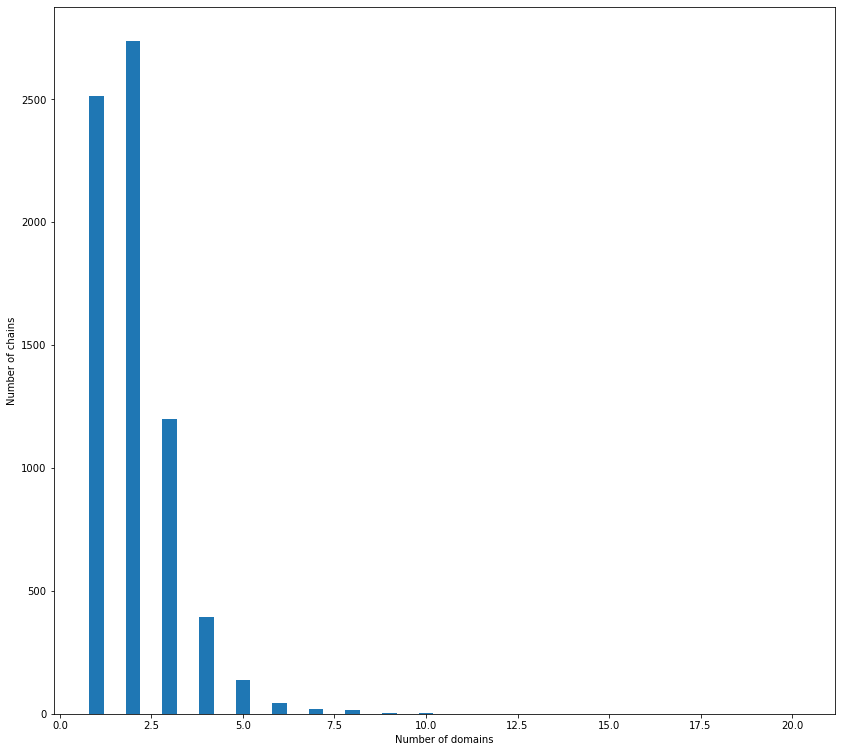

Chains with 3 domains: 1201
Chains with 2 domains: 2739
Chains with 1 domains: 2513
Chains with 4 domains: 395
Chains with 8 domains: 14
Chains with 6 domains: 44
Chains with 5 domains: 137
Chains with 7 domains: 20
Chains with 10 domains: 5
Chains with 13 domains: 1
Chains with 11 domains: 1
Chains with 9 domains: 2
Chains with 12 domains: 1


In [45]:
domains = [i for i in range(1,21)]
size = [len(num_domains_iid.get(i,[])) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in [int(x) for x in num_domains_iid.keys()]:
    print(f"Chains with {k} domains: {len(num_domains_iid[k])}")

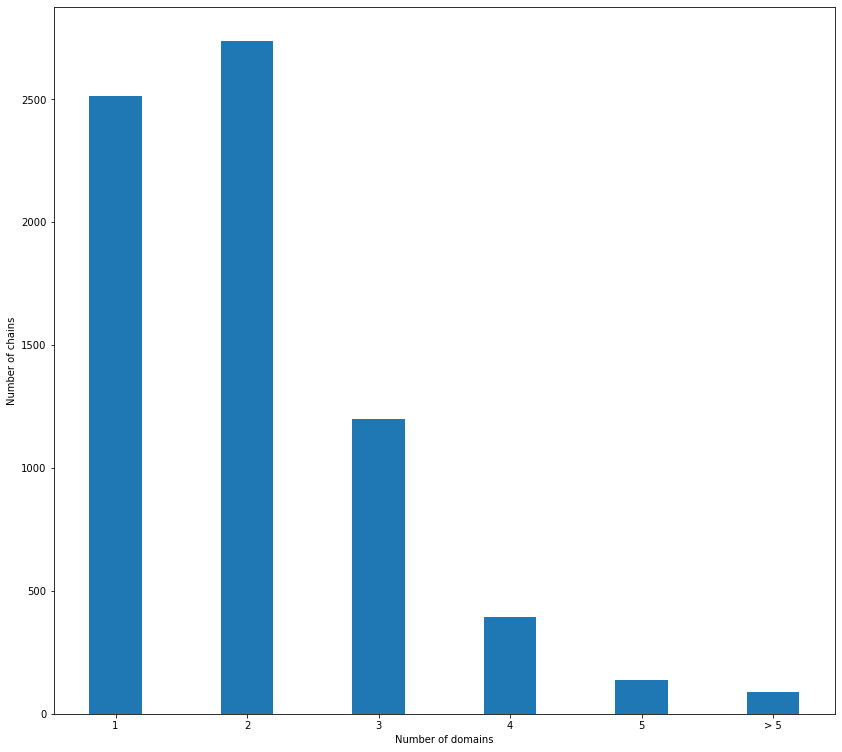

Chains with 1 domains: 2513
Chains with 2 domains: 2739
Chains with 3 domains: 1201
Chains with 4 domains: 395
Chains with 5 domains: 137
Chains with > 5 domains: 88


In [46]:
n = 6
domains = [str(i) for i in range(1,n)]
size = [len(num_domains_iid.get(i,[] )) for i in range(1,n)]

more_than_n = sum([len(num_domains_iid.get(i,[] )) for i in range(n,21)])

domains.append('> 5')
size.append(more_than_n)

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in range(1, n):
    try:
        print(f"Chains with {k} domains: {len(num_domains_iid[k])}")
    except KeyError:
        continue

print(f"Chains with > {n-1} domains: {more_than_n}")

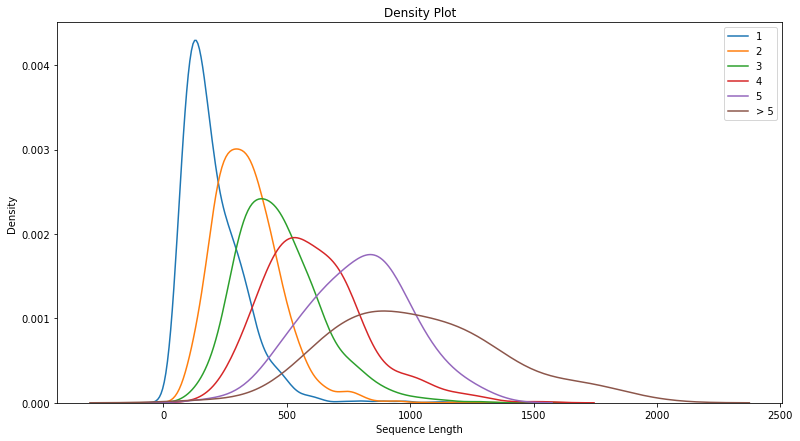

In [47]:
densities = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '> 5' : []
    }
n = 6

for chain, seq in chain_to_seq.items():
    no = number_of_domains(chain)
    if no >= 6:
            densities['> 5'].append(len(seq))
    else:
        densities[str(no)].append(len(seq))

fig = plt.figure(figsize = (13, 7))
labels = []

for k, v in densities.items():
    sns.kdeplot(data=v, bw_adjust=1.2)
    labels.append(k)

plt.legend(labels=labels)
plt.xlabel("Sequence Length")    
plt.title("Density Plot")
plt.show()

In [49]:
with open('../data/cath/iid/chains_to_seq_iid.json', 'w') as fp:
    json.dump(chain_to_seq, fp)

In [48]:
unique_amino_acids = set()
for chain, seq in chain_to_seq.items():
    for i, aa in enumerate(seq):
        unique_amino_acids.add(aa)
        
print("Len:", len(unique_amino_acids))
print(unique_amino_acids)

Len: 21
{'H', 'G', 'E', 'P', 'R', 'K', 'L', 'D', 'A', 'X', 'S', 'W', 'F', 'Y', 'V', 'N', 'Q', 'I', 'M', 'T', 'C'}


In [ ]:
# write every pdb code to a file to create mappings
with open("../data/cath/iid/list_of_final_chains.txt", "w") as f:
	for chain in list(set([x[:4] for x in chain_to_seq.keys()])):
		f.write(chain + '\n')